# This notebook has code to download a medical image dataset, augment it's images & create a new Dataset
# The below cell is to download the dataset on your local system
# Link to dataset on Kaggle: https://www.kaggle.com/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri?resource=download
# Approx time to download dataset: 10-15 min
# It won't download the dataset if already present to save time

In [1]:
# Download Medical images in path

import kagglehub

# Download latest version
path = kagglehub.dataset_download("murtozalikhon/brain-tumor-multimodal-image-ct-and-mri")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Adarsh\.cache\kagglehub\datasets\murtozalikhon\brain-tumor-multimodal-image-ct-and-mri\versions\1


# The following commands are to perform augmentations & create a new dataset
# Note: Running each cell will take approx. 5 - 10 min

In [4]:
# Create 1500 images per Tumor class in New_Dataset/MRI/Tumor

import os
import cv2
import numpy as np
from tqdm import tqdm
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, RandomScale,
    Affine, RandomBrightnessContrast, GaussNoise,
    MultiplicativeNoise, GaussianBlur, RandomGamma,
    Equalize, ElasticTransform
)

# Set seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Directories
BASE_DIR = path
SOURCE_DIR = os.path.join(BASE_DIR, "Dataset", "Brain Tumor MRI images", "Tumor")
DEST_DIR = os.path.join(BASE_DIR, "New_Dataset", "MRI", "Tumor")
os.makedirs(DEST_DIR, exist_ok=True)

# MRI Tumor Subclasses
target_count = 1500
subclass_prefixes = {
    "glioma": "glioma",
    "meningioma": "meningioma",
    "pituitary": "pituitary",
    "tumor": "tumor"
}

# Albumentations pipeline
transform = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    RandomScale(scale_limit=0.1, p=0.5),
    Affine(scale=(0.95, 1.05), translate_percent=(0.05, 0.05), rotate=(-15, 15), p=0.5),
    RandomBrightnessContrast(p=0.5),
    GaussNoise(p=0.5),
    MultiplicativeNoise(multiplier=(0.9, 1.1), p=0.5),
    GaussianBlur(blur_limit=(3, 5), p=0.5),
    RandomGamma(p=0.5),
    Equalize(p=0.3),
    ElasticTransform(alpha=1, sigma=50, p=0.3)
])

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"❌ Cannot load image: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Start augmentation
for subclass, prefix in subclass_prefixes.items():
    print(f"\n🔍 Processing: {subclass}")

    # Output folder
    subclass_dest_dir = os.path.join(DEST_DIR, subclass)
    os.makedirs(subclass_dest_dir, exist_ok=True)

    # Original images
    images = [f for f in os.listdir(SOURCE_DIR) if f.lower().startswith(prefix)]
    current_count = len(images)
    print(f"   📷 Found: {current_count} images")

    augment_needed = target_count
    image_paths = [os.path.join(SOURCE_DIR, f) for f in images]
    print(f"   🔧 Generating {augment_needed} augmented images")

    aug_index = 0
    while augment_needed > 0:
        for img_path in image_paths:
            if augment_needed <= 0:
                break
            try:
                image = load_image(img_path)
                augmented = transform(image=image)["image"]
                augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

                save_name = f"{prefix}_aug_albu_{aug_index}.jpg"
                save_path = os.path.join(subclass_dest_dir, save_name)
                cv2.imwrite(save_path, augmented)

                aug_index += 1
                augment_needed -= 1
            except Exception as e:
                print(f"   ⚠️ Error: {img_path} — {e}")

    print(f"   ✅ Done: {subclass} now has {target_count} images")

print("\n🎉 All subclasses augmented. Output in 'New_Dataset\\MRI\\Tumor'")



🔍 Processing: glioma
   📷 Found: 672 images
   🔧 Generating 1500 augmented images
   ✅ Done: glioma now has 1500 images

🔍 Processing: meningioma
   📷 Found: 1112 images
   🔧 Generating 1500 augmented images
   ✅ Done: meningioma now has 1500 images

🔍 Processing: pituitary
   📷 Found: 629 images
   🔧 Generating 1500 augmented images
   ✅ Done: pituitary now has 1500 images

🔍 Processing: tumor
   📷 Found: 587 images
   🔧 Generating 1500 augmented images
   ✅ Done: tumor now has 1500 images

🎉 All subclasses augmented. Output in 'New_Dataset\MRI\Tumor'


In [5]:
# Create 1500 images in New_Dataset/MRI/Healthy from Healthy images

import os
import cv2
import numpy as np
from tqdm import tqdm
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, RandomScale,
    Affine, RandomBrightnessContrast, GaussNoise,
    MultiplicativeNoise, GaussianBlur, RandomGamma,
    Equalize, ElasticTransform
)

# Set seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Directories
BASE_DIR = path
SOURCE_DIR = os.path.join(BASE_DIR, "Dataset", "Brain Tumor MRI images", "Healthy")
DEST_DIR = os.path.join(BASE_DIR, "New_Dataset", "MRI", "Healthy")
os.makedirs(DEST_DIR, exist_ok=True)

# Target number of augmented images
target_count = 1500

# Albumentations pipeline (same as before)
transform = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    RandomScale(scale_limit=0.1, p=0.5),
    Affine(scale=(0.95, 1.05), translate_percent=(0.05, 0.05), rotate=(-15, 15), p=0.5),
    RandomBrightnessContrast(p=0.5),
    GaussNoise(p=0.5),
    MultiplicativeNoise(multiplier=(0.9, 1.1), p=0.5),
    GaussianBlur(blur_limit=(3, 5), p=0.5),
    RandomGamma(p=0.5),
    Equalize(p=0.3),
    ElasticTransform(alpha=1, sigma=50, p=0.3)
])

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"❌ Cannot load image: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load all healthy image paths
image_files = [f for f in os.listdir(SOURCE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_paths = [os.path.join(SOURCE_DIR, f) for f in image_files]
print(f"\n📷 Found {len(image_paths)} original healthy images")
print(f"🔧 Generating {target_count} augmented images")

# Start augmentation
aug_index = 0
augment_needed = target_count

while augment_needed > 0:
    for img_path in image_paths:
        if augment_needed <= 0:
            break
        try:
            image = load_image(img_path)
            augmented = transform(image=image)["image"]
            augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

            save_name = f"healthy_aug_albu_{aug_index}.jpg"
            save_path = os.path.join(DEST_DIR, save_name)
            cv2.imwrite(save_path, augmented)

            aug_index += 1
            augment_needed -= 1
        except Exception as e:
            print(f"⚠️ Error: {img_path} — {e}")

print(f"\n✅ Done: 1500 augmented healthy images saved in 'New_Dataset\\MRI\\Healthy'")



📷 Found 2000 original healthy images
🔧 Generating 1500 augmented images

✅ Done: 1500 augmented healthy images saved in 'New_Dataset\MRI\Healthy'


In [7]:
# Create 3750 images in New_Dataset/CT/Healthy from Healthy images

import os
import cv2
import numpy as np
from tqdm import tqdm
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, RandomScale,
    Affine, RandomBrightnessContrast, GaussNoise,
    MultiplicativeNoise, GaussianBlur, RandomGamma,
    Equalize, ElasticTransform
)

# Set seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Directories
BASE_DIR = path
SOURCE_DIR = os.path.join(BASE_DIR, "Dataset", "Brain Tumor CT scan Images", "Healthy")
DEST_DIR = os.path.join(BASE_DIR, "New_Dataset", "CT", "Healthy")
os.makedirs(DEST_DIR, exist_ok=True)

# Target number of augmented images
target_count = 3750

# Albumentations pipeline (same as before)
transform = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    RandomScale(scale_limit=0.1, p=0.5),
    Affine(scale=(0.95, 1.05), translate_percent=(0.05, 0.05), rotate=(-15, 15), p=0.5),
    RandomBrightnessContrast(p=0.5),
    GaussNoise(p=0.5),
    MultiplicativeNoise(multiplier=(0.9, 1.1), p=0.5),
    GaussianBlur(blur_limit=(3, 5), p=0.5),
    RandomGamma(p=0.5),
    Equalize(p=0.3),
    ElasticTransform(alpha=1, sigma=50, p=0.3)
])

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"❌ Cannot load image: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load all healthy image paths
image_files = [f for f in os.listdir(SOURCE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_paths = [os.path.join(SOURCE_DIR, f) for f in image_files]
print(f"\n📷 Found {len(image_paths)} original healthy CT images")
print(f"🔧 Generating {target_count} augmented images")

# Start augmentation
aug_index = 0
augment_needed = target_count

while augment_needed > 0:
    for img_path in image_paths:
        if augment_needed <= 0:
            break
        try:
            image = load_image(img_path)
            augmented = transform(image=image)["image"]
            augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

            save_name = f"healthy_aug_albu_CT_{aug_index}.jpg"
            save_path = os.path.join(DEST_DIR, save_name)
            cv2.imwrite(save_path, augmented)

            aug_index += 1
            augment_needed -= 1
        except Exception as e:
            print(f"⚠️ Error: {img_path} — {e}")

print(f"\n✅ Done: 1500 augmented healthy images saved in 'New_Dataset\\CT\\Healthy'")



📷 Found 2300 original healthy CT images
🔧 Generating 3750 augmented images

✅ Done: 1500 augmented healthy images saved in 'New_Dataset\CT\Healthy'


In [8]:
# Create 3750 images in New_Dataset/CT/Healthy from Healthy images

import os
import cv2
import numpy as np
from tqdm import tqdm
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, RandomScale,
    Affine, RandomBrightnessContrast, GaussNoise,
    MultiplicativeNoise, GaussianBlur, RandomGamma,
    Equalize, ElasticTransform
)

# Set seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Directories
BASE_DIR = path
SOURCE_DIR = os.path.join(BASE_DIR, "Dataset", "Brain Tumor CT scan Images", "Tumor")
DEST_DIR = os.path.join(BASE_DIR, "New_Dataset", "CT", "Tumor")
os.makedirs(DEST_DIR, exist_ok=True)

# Target number of augmented images
target_count = 3750

# Albumentations pipeline (same as before)
transform = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    RandomScale(scale_limit=0.1, p=0.5),
    Affine(scale=(0.95, 1.05), translate_percent=(0.05, 0.05), rotate=(-15, 15), p=0.5),
    RandomBrightnessContrast(p=0.5),
    GaussNoise(p=0.5),
    MultiplicativeNoise(multiplier=(0.9, 1.1), p=0.5),
    GaussianBlur(blur_limit=(3, 5), p=0.5),
    RandomGamma(p=0.5),
    Equalize(p=0.3),
    ElasticTransform(alpha=1, sigma=50, p=0.3)
])

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"❌ Cannot load image: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load all healthy image paths
image_files = [f for f in os.listdir(SOURCE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_paths = [os.path.join(SOURCE_DIR, f) for f in image_files]
print(f"\n📷 Found {len(image_paths)} original tumor CT images")
print(f"🔧 Generating {target_count} augmented images")

# Start augmentation
aug_index = 0
augment_needed = target_count

while augment_needed > 0:
    for img_path in image_paths:
        if augment_needed <= 0:
            break
        try:
            image = load_image(img_path)
            augmented = transform(image=image)["image"]
            augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

            save_name = f"tumor_aug_albu_CT_{aug_index}.jpg"
            save_path = os.path.join(DEST_DIR, save_name)
            cv2.imwrite(save_path, augmented)

            aug_index += 1
            augment_needed -= 1
        except Exception as e:
            print(f"⚠️ Error: {img_path} — {e}")

print(f"\n✅ Done: 1500 augmented tumor images saved in 'New_Dataset\\CT\\Tumor'")



📷 Found 2318 original tumor CT images
🔧 Generating 3750 augmented images

✅ Done: 1500 augmented tumor images saved in 'New_Dataset\CT\Tumor'


# The following commands are for visualizing & understanding the new dataset

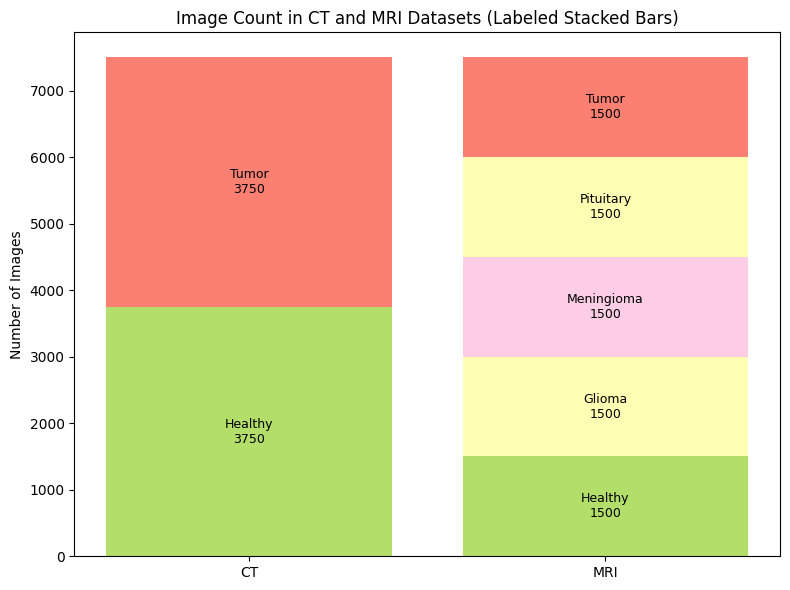

In [10]:
# Visualize the newly created dataset

import os
import matplotlib.pyplot as plt

# Base path to New_Dataset
base_path = os.path.join(path, "New_Dataset")

# Count images in a directory (recursively)
def count_images(directory):
    return sum(len(files) for _, _, files in os.walk(directory) if files)

# CT counts
ct_healthy = count_images(os.path.join(base_path, "CT", "Healthy"))
ct_tumor = count_images(os.path.join(base_path, "CT", "Tumor"))

# MRI counts
mri_healthy = count_images(os.path.join(base_path, "MRI", "Healthy"))
mri_glioma = count_images(os.path.join(base_path, "MRI", "Tumor", "glioma"))
mri_meningioma = count_images(os.path.join(base_path, "MRI", "Tumor", "meningioma"))
mri_pituitary = count_images(os.path.join(base_path, "MRI", "Tumor", "pituitary"))
mri_tumor = count_images(os.path.join(base_path, "MRI", "Tumor", "tumor"))

# Data for plotting
labels = ["CT", "MRI"]
ct_values = [("Healthy", ct_healthy), ("Tumor", ct_tumor)]
mri_values = [("Healthy", mri_healthy), ("Glioma", mri_glioma),
              ("Meningioma", mri_meningioma), ("Pituitary", mri_pituitary), ("Tumor", mri_tumor)]

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))

# Plot CT bar
ct_bottom = 0
for label, val in ct_values:
    ax.bar("CT", val, bottom=ct_bottom, color=plt.cm.Set3(hash(label) % 12))
    ax.text("CT", ct_bottom + val / 2, f"{label}\n{val}", ha='center', va='center', fontsize=9)
    ct_bottom += val

# Plot MRI bar
mri_bottom = 0
for label, val in mri_values:
    ax.bar("MRI", val, bottom=mri_bottom, color=plt.cm.Set3(hash(label) % 12))
    ax.text("MRI", mri_bottom + val / 2, f"{label}\n{val}", ha='center', va='center', fontsize=9)
    mri_bottom += val

# Final touches
ax.set_ylabel("Number of Images")
ax.set_title("Image Count in CT and MRI Datasets (Labeled Stacked Bars)")
plt.tight_layout()
plt.show()


In [13]:
# Calculate the size of created directory: New_Dataset

import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if os.path.isfile(fp):
                total_size += os.path.getsize(fp)
    return total_size

# Replace with actual path if needed
new_dataset_path = os.path.join(path, "New_Dataset")
total_bytes = get_directory_size(new_dataset_path)

# Convert to readable units
size_mb = total_bytes / (1024 * 1024)
size_gb = total_bytes / (1024 * 1024 * 1024)

print(f"📦 Dataset Size: {size_mb:.2f} MB ({size_gb:.2f} GB)")


📦 Dataset Size: 2208.93 MB (2.16 GB)


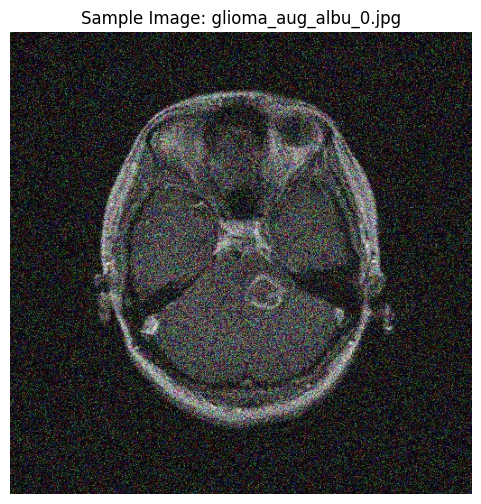

In [24]:
# Visualize one of the images

import os
import cv2
import matplotlib.pyplot as plt

# Example: visualize one image from MRI/Tumor/glioma
image_dir = os.path.join(path, "New_Dataset", "MRI", "Tumor", "glioma")
image_files = os.listdir(image_dir)

# Pick the first image (or change the index to view a different one)
image_path = os.path.join(image_dir, image_files[5])

# Load and convert BGR to RGB for display
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title(f"Sample Image: {image_files[0]}")
plt.axis('off')
plt.show()


# The following commands are to find the path of this jupyter notebook file

In [25]:
!pip install ipynbname



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import ipynbname
from pathlib import Path

try:
    notebook_path = ipynbname.path()  # returns a pathlib.Path object
    print("📄 Notebook Name:", notebook_path.name)
    print("📁 Full Path to Notebook:\n", notebook_path.resolve())
except FileNotFoundError:
    print("⚠️ Cannot determine notebook path (are you in JupyterLab without the right extensions?)")


📄 Notebook Name: VIT_Project1_Adarsh.ipynb
📁 Full Path to Notebook:
 C:\Users\Adarsh\VIT_Project1_Adarsh.ipynb


In [ ]:
import os
import shutil
import subprocess
from pathlib import Path

# === SETTINGS ===
repo_url = "https://github.com/AnkitD0811/ml-research-project.git"
repo_name = "ml-research-project"
notebook_path = Path("C:/Users/Adarsh/VIT_Project1_Adarsh.ipynb")
target_dir = Path.home() / "Documents" / repo_name  # change if needed

# === Step 1: Clone the GitHub repo ===
if not target_dir.exists():
    print("📥 Cloning repository...")
    result = subprocess.run(["git", "clone", repo_url, str(target_dir)], capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print("⚠️", result.stderr)
else:
    print("✅ Repo already exists locally at:", target_dir)

# === Step 2: Copy the notebook ===
dest_path = target_dir / notebook_path.name
shutil.copy2(notebook_path, dest_path)
print(f"📄 Copied notebook to {dest_path}")

# === Step 3: Git add, commit, push ===
print("📤 Adding, committing, and pushing the file...")

commands = [
    ["git", "add", notebook_path.name],
    ["git", "commit", "-m", f"Add notebook {notebook_path.name}"],
    ["git", "push"]
]

for cmd in commands:
    result = subprocess.run(cmd, cwd=target_dir, capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print("⚠️", result.stderr)


📥 Cloning repository...
